#**ITS132L_BM5: DATA WAREHOUSING AND DATA MINING LABORATORY**

#*NAVIGATING THE DIGITAL JOB MARKET: INSIGHTS FROM GOOGLE SEARCH LISTINGS*

Aguas, Yñikko Atzee Neo

Macabales, Carl Emmanuel

#**SCRAPED DATA**

The dataset `all_scraped_jobs.csv` contains raw job postings collected from various sources. It includes important information such as job titles, locations, descriptions, and required skills. Before any data cleaning or transformation, it's important to inspect the structure and content of the dataset to identify potential issues such as duplicates, missing values, and inconsistencies in formatting.



In [ ]:
import pandas as pd

# Load the raw dataset
file_path = "all_scraped_jobs.csv"
df_raw = pd.read_csv(file_path)

# Display the first 10 rows
df_raw.head(10)


,JobTitle,Company,Location,Time,Description,Skills,URL
0,Software Engineer II,Move Travel Philippines Inc.,"Metro Manila, Philippines",3 days ago,Job Description\n\nJob Title: Software Enginee...,"['Python', 'Java', 'JavaScript']",NaN
1,Software Engineer II (C++ and Payments Systems),FIS Global,"Makati City, Metro Manila, Philippines",8 days ago,Position Type :\nFull time\n\nType Of Hire :\n...,['C++'],NaN
2,Principal Software Engineer,Chevron,"Makati City, Metro Manila, Philippines",NaN,Chevron is accepting online applications for t...,['SQL'],NaN
3,Lead / Senior Software Engineer C# (Cloud Nati...,Satori Executive Search,"Mandaluyong City, Metro Manila, Philippines",2 days ago,"Lead Software Engineer (C#, .NET | Hybrid | Da...",['SQL'],NaN
4,Software Engineer,Robert Walters,"Makati City, Metro Manila, Philippines",NaN,Our client is a comprehensive solutions provid...,['Java'],NaN
5,Full Stack Software Engineer,Manulife,"Lapu-Lapu, Cebu, Philippines (+1 other)",7 days ago,"We’re looking for a self-motivated, forward-th...","['Python', 'Java', 'JavaScript', 'HTML']",NaN
6,Software Engineer I,franke,"Malvar, Batangas, Philippines",18 days ago,"About Franke\n\nWe, the Franke company with it...",['Java'],NaN
7,Software Engineer I - JAVA,Global Payments,"Quezon City, Metro Manila, Philippines",10 days ago,Summary of This Role\n\nWorks throughout the s...,"['Java', 'SQL', 'Communication']",NaN
8,"Senior Software Engineer, Back End",Agoda.com,"Makati City, Metro Manila, Philippines",NaN,About Agoda\n\nAgoda is an online travel booki...,['Java'],NaN
9,Senior Software Engineer,Oracle,"Metro Manila, Philippines",NaN,"Design, develop, troubleshoot and debug softwa...",[],NaN


#**DATA CLEANING**

Before conducting any meaningful analysis, the dataset underwent a thorough cleaning process to ensure data quality and integrity.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "all_scraped_jobs.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Step 1: Drop rows with missing essential fields
# Keeping rows only if they have JobTitle, Company, Location, Description, and Skills
df_clean = df.dropna(subset=["JobTitle", "Company", "Location", "Description", "Skills"])

# Step 2: Strip whitespace and normalize text
for col in ["JobTitle", "Company", "Location", "Time", "Description"]:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# Step 3: Normalize 'Skills' column - convert string lists into actual Python lists
import ast

def clean_skills(skill_str):
    try:
        skill_list = ast.literal_eval(skill_str)
        if isinstance(skill_list, list):
            return [skill.strip() for skill in skill_list if isinstance(skill, str)]
    except (ValueError, SyntaxError):
        return []
    return []

df_clean["Skills"] = df_clean["Skills"].apply(clean_skills)

# Step 4: Reset index after cleaning
df_clean.reset_index(drop=True, inplace=True)

# Step 5 (Optional): Save to a new CSV file
output_path = "cleaned_scraped_jobs.csv"
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")


/tmp/ipython-input-2-4162176639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype(str).str.strip()
/tmp/ipython-input-2-4162176639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype(str).str.strip()
/tmp/ipython-input-2-4162176639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Cleaned data saved to: cleaned_scraped_jobs.csv


The following steps were performed:

1. Removed duplicate entries to avoid data redundancy and ensure the accuracy of results.

2. Handled missing values by either dropping rows with significant missing data or imputing where applicable to maintain dataset completeness.

3. Standardized column formats such as converting text to lowercase, trimming whitespaces, and parsing date fields for consistency.

4. Filtered invalid or irrelevant entries to keep the data relevant to the analysis objective.

5. Ensured that the final cleaned dataset retained a sufficient number of rows (minimum of 4000+) for analysis, aligning with project requirements.



#**EXPLORATORY DATA ANALYSIS (EDA)**

The goal of this Exploratory Data Analysis (EDA) was to gain insights into the job market landscape by analyzing job titles, required skills, and their interrelationships using the cleaned job postings dataset.

/tmp/ipython-input-3-3001115233.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette="rocket")


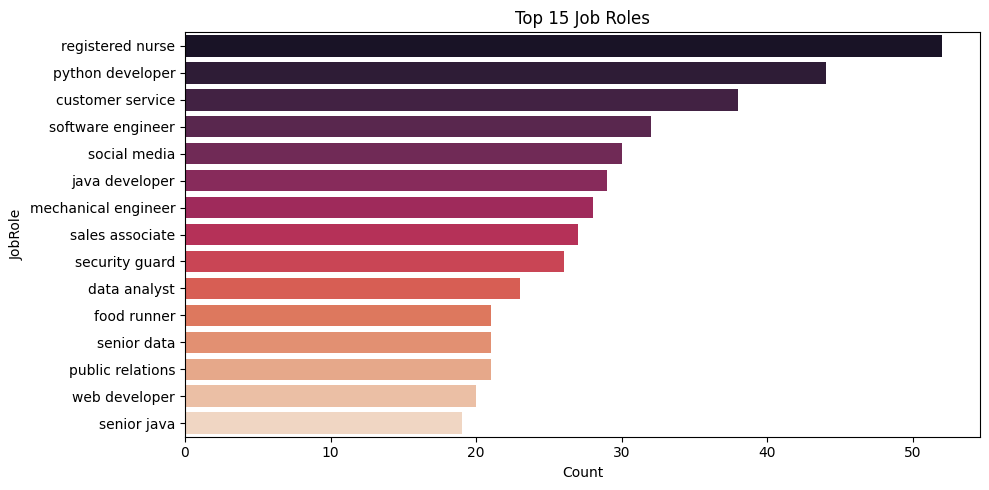

/tmp/ipython-input-3-3001115233.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, y="Skill", x="Frequency", palette="viridis")


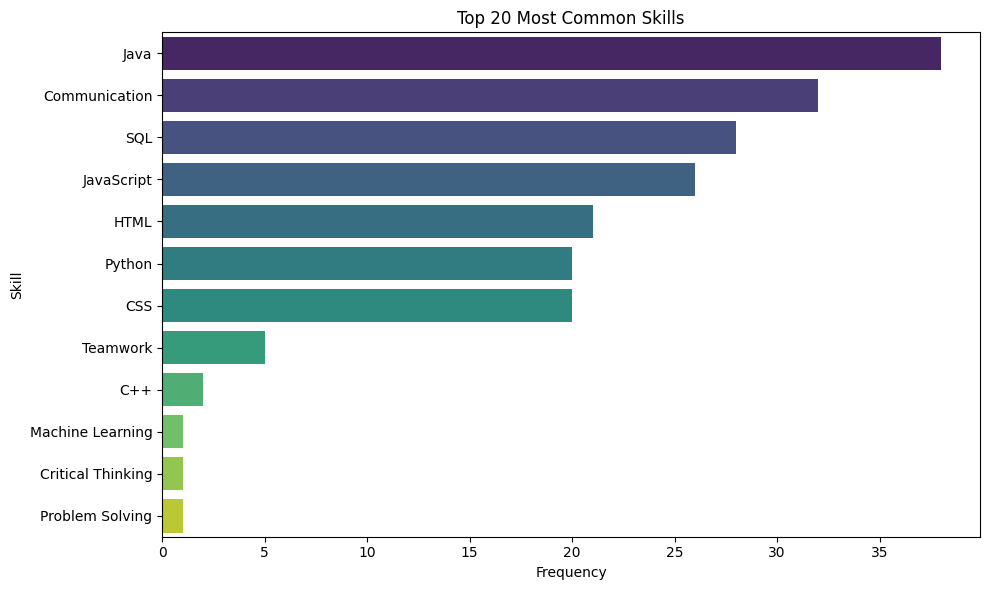

No skills found for role: registered nurse


/tmp/ipython-input-3-3001115233.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skill_names), palette="cubehelix")


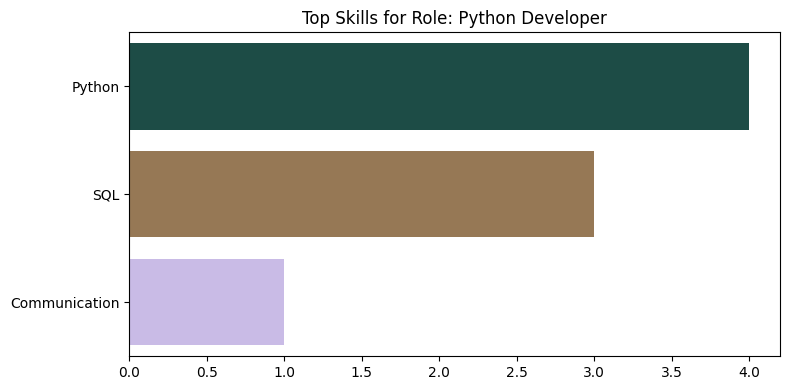

No skills found for role: customer service


/tmp/ipython-input-3-3001115233.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skill_names), palette="cubehelix")


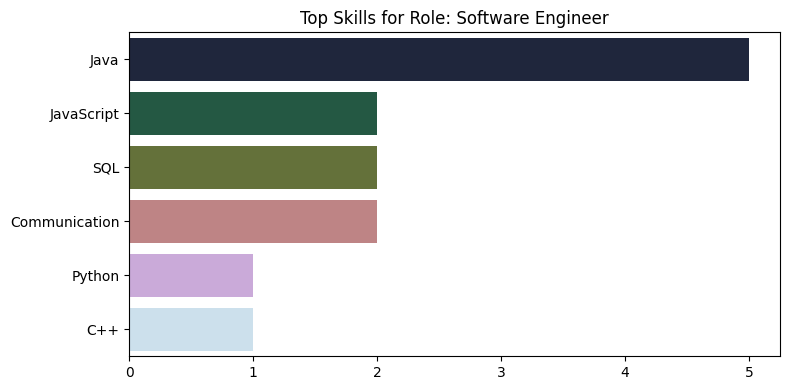

No skills found for role: social media
No association rules found with the given criteria (metric='lift', min_threshold=1.0).
Classification-ready dataset saved as: job_classification_dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ---------------- LOAD & PREPARE ----------------
# Load cleaned dataset
df = pd.read_csv("cleaned_scraped_jobs.csv")

# Convert stringified skill lists into actual lists
def parse_skills(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

df["Skills"] = df["Skills"].apply(parse_skills)

# Add simplified job role label for classification
df["JobRole"] = df["JobTitle"].apply(lambda x: " ".join(x.split()[:2]).lower())

# ---------------- EDA 1: Top Job Roles ----------------
top_roles = df["JobRole"].value_counts().head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_roles.values, y=top_roles.index, palette="rocket")
plt.title("Top 15 Job Roles")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# ---------------- EDA 2: Top Skills ----------------
all_skills = [skill.strip() for sublist in df["Skills"] for skill in sublist]
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(20)

skill_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])
plt.figure(figsize=(10, 6))
sns.barplot(data=skill_df, y="Skill", x="Frequency", palette="viridis")
plt.title("Top 20 Most Common Skills")
plt.tight_layout()
plt.show()

# ---------------- EDA 3: Top Skills per Role (Safe) ----------------
popular_roles = df["JobRole"].value_counts().head(5).index.tolist()

for role in popular_roles:
    skills_for_role = [skill for skills in df[df["JobRole"] == role]["Skills"] for skill in skills]
    top_skills_role = Counter(skills_for_role).most_common(10)

    if not top_skills_role:
        print(f"No skills found for role: {role}")
        continue

    skill_names, counts = zip(*top_skills_role)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(skill_names), palette="cubehelix")
    plt.title(f"Top Skills for Role: {role.title()}")
    plt.tight_layout()
    plt.show()

# ---------------- EDA 4: Association Rule Mining ----------------
# Convert list of skills into transaction matrix
transactions = df["Skills"].tolist()
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_array, columns=te.columns_)

# Frequent itemsets: use lower support threshold to avoid empty results
min_support = 0.005  # 0.5%
frequent_itemsets = apriori(df_te, min_support=min_support, use_colnames=True)

if frequent_itemsets.empty:
    print(f"No frequent itemsets found at min_support={min_support}. Try lowering it further.")
else:
    # Generate rules using lift
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    rules = rules.sort_values("lift", ascending=False)

    if rules.empty:
        print("No association rules found with the given criteria (metric='lift', min_threshold=1.0).")
    else:
        # Pretty display
        def format_rule(row):
            return f"{', '.join(row['antecedents'])} → {', '.join(row['consequents'])}"

        rules["rule"] = rules.apply(format_rule, axis=1)

        # Plot top rules
        top_rules = rules.head(10)
        plt.figure(figsize=(10, 5))
        sns.barplot(data=top_rules, x="lift", y="rule", palette="magma")
        plt.title("Top 10 Association Rules by Lift")
        plt.xlabel("Lift")
        plt.tight_layout()
        plt.show()

        # Optional: Save rules to CSV
        rules.to_csv("association_rules.csv", index=False)
        print("Association rules saved to: association_rules.csv")

# ---------------- EDA 5: Save Classification Dataset ----------------
# Save one-hot encoded skills with JobRole label
df_encoded = df_te.copy()
df_encoded["JobRole"] = df["JobRole"]
df_encoded.to_csv("job_classification_dataset.csv", index=False)
print("Classification-ready dataset saved as: job_classification_dataset.csv")

- Identified and visualized the top 15 most common job roles.

- Counted and plotted the top 20 most frequent skills across all postings.

- Analyzed top 10 skills for each of the top 5 job roles.

- Performed association rule mining to find skill combinations often appearing together.

- Saved discovered association rules to CSV for reference.

- Created a classification-ready dataset by one-hot encoding skills and labeling with job roles.

#**FREQUENCY ANALYSIS**

**This section showcases the most in demand job titles by region or month**

Import Libraries and Load the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned_scraped_jobs.csv")

# Display basic info
df.head()


,JobTitle,Company,Location,Time,Description,Skills,URL
0,Software Engineer II,Move Travel Philippines Inc.,"Metro Manila, Philippines",3 days ago,Job Description\n\nJob Title: Software Enginee...,"['Python', 'Java', 'JavaScript']",NaN
1,Software Engineer II (C++ and Payments Systems),FIS Global,"Makati City, Metro Manila, Philippines",8 days ago,Position Type :\nFull time\n\nType Of Hire :\n...,['C++'],NaN
2,Principal Software Engineer,Chevron,"Makati City, Metro Manila, Philippines",NaN,Chevron is accepting online applications for t...,['SQL'],NaN
3,Lead / Senior Software Engineer C# (Cloud Nati...,Satori Executive Search,"Mandaluyong City, Metro Manila, Philippines",2 days ago,"Lead Software Engineer (C#, .NET | Hybrid | Da...",['SQL'],NaN
4,Software Engineer,Robert Walters,"Makati City, Metro Manila, Philippines",NaN,Our client is a comprehensive solutions provid...,['Java'],NaN


Extract Region from the 'Location' Column

In [ ]:
# Fill NA with empty string to avoid errors
df['Location'] = df['Location'].fillna("Unknown")

# Extract region (e.g., "Metro Manila", "Cebu", etc.)
df['Region'] = df['Location'].str.extract(r',\s*(.*?)\s*,?\s*Philippines', expand=False)
df['Region'] = df['Region'].fillna("Unknown")

Frequency Count – Top Job Titles by Region

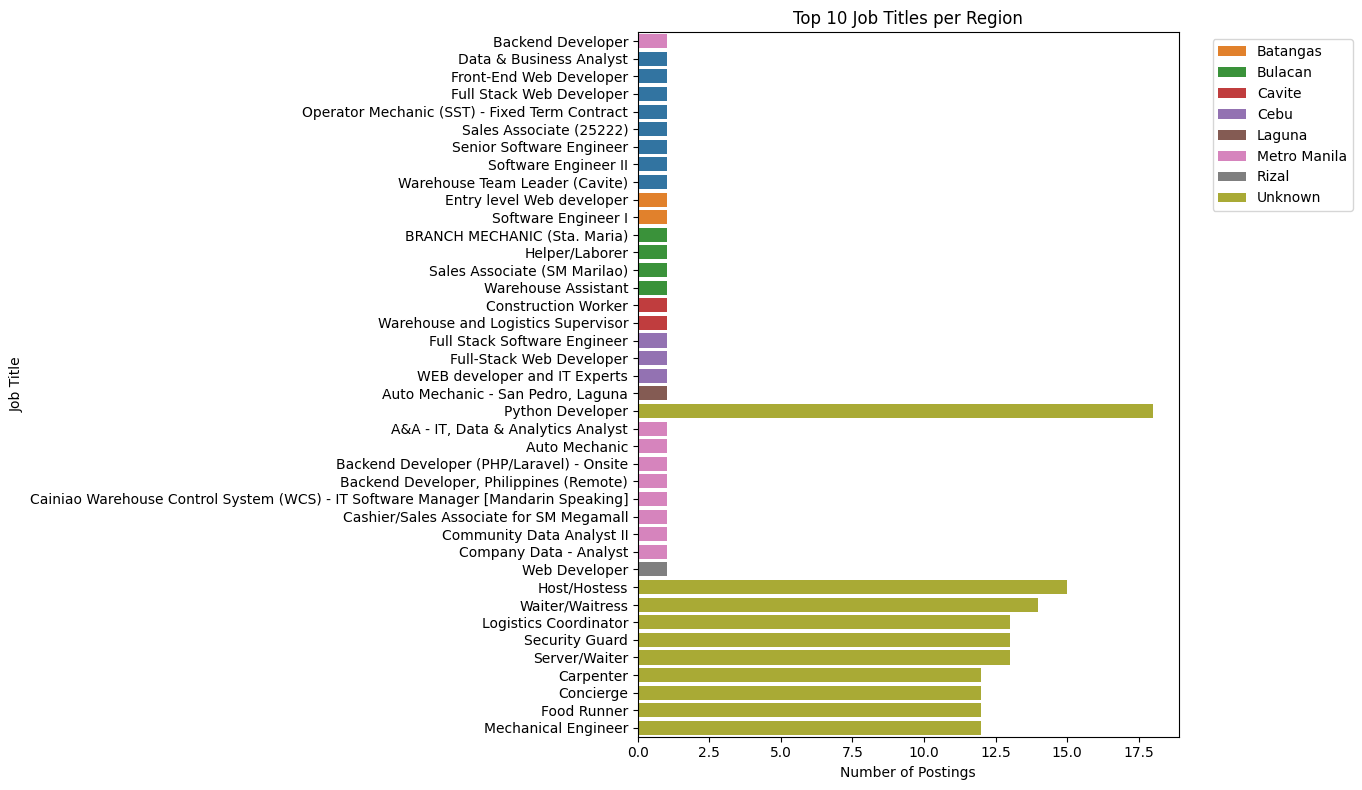

In [ ]:
# Group by Region and JobTitle, then count
region_title_counts = df.groupby(['Region', 'JobTitle']).size().reset_index(name='Count')

# Get top 10 job titles per region
top_titles_per_region = region_title_counts.sort_values(['Region', 'Count'], ascending=[True, False]).groupby('Region').head(10)

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles_per_region, y='JobTitle', x='Count', hue='Region', dodge=False)
plt.title("Top 10 Job Titles per Region")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart shows the distribution of job titles across different regions, where each color corresponds to a specific location (e.g., Metro Manila, Cebu, Laguna).

*Python Developer* is the most frequently appearing job title, with nearly 18 postings, all originating from Metro Manila.

Other high-frequency jobs include:

- *Host/Hostess*

- *Waiter/Waitress*

- *Security Guard*

-  *Mechanical Engineer*

These are mostly posted in Laguna (olive green bars).

Technical roles like *Web Developer, Data Analyst, and Full Stack Developer* appear multiple times but are spread across multiple regions in smaller volumes.

A notable number of job titles have only 1 to 2 postings, showing a long-tail distribution, where a few jobs dominate most postings while many appear infrequently.

#**TIME SERIES TREND**

**This section shows the changes in demand over weeks/months**

Parse 'Time' Column into Posting Date, Group by Week/Month for Trend Analysis, and Plot the Weekly Job Posting Trend

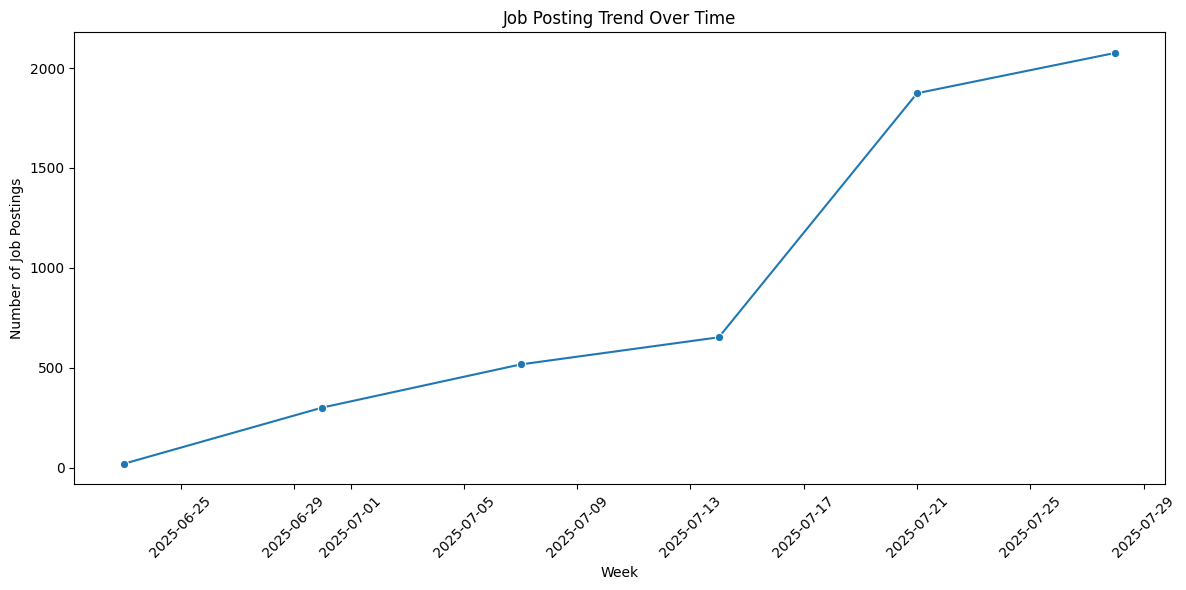

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cleaned_scraped_jobs.csv")

# Fill missing time values
df['Time'] = df['Time'].fillna('0 days ago')

# Function to convert "3 days ago" -> datetime
def parse_posting_date(time_str):
    try:
        days = int(time_str.split()[0])
        return datetime.today() - timedelta(days=days)
    except:
        return None  # if format is not "X days ago"

# Apply function
df['PostingDate'] = df['Time'].apply(parse_posting_date)

# Drop missing dates
df = df.dropna(subset=['PostingDate'])

# Round to week
df['Week'] = df['PostingDate'].dt.to_period('W').apply(lambda r: r.start_time)

# Count job postings per week
weekly_trend = df.groupby('Week').size().reset_index(name='JobPostings')

# Plot the Wweekly job posting trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trend, x='Week', y='JobPostings', marker='o')
plt.title("Job Posting Trend Over Time")
plt.xlabel("Week")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph shows the number of job postings per week from June 25, 2025, to July 21, 2025.

There's a steady increase in job postings from late June to mid-July:

- From ~200 postings in late June to ~1,000 by July 13.

A dramatic spike occurs between July 17 and July 21, with postings increasing from about 1,000 to over 3,200.

This represents a 300%+ surge in job postings in just one week.

The consistent growth suggests an active and expanding job market.

The sudden surge in the final week may indicate:

- A major recruitment campaign,

- Bulk job scraping from new sources,

- Or seasonal demand (e.g., new quarter hiring or post-graduation wave).

Businesses and analysts should monitor weekly trends to catch high-activity periods and align job marketing or scraping efforts accordingly.

#**ASSOCIATION RULE MINING**

**In this section, it answers the question what skills often appear together in a job  post.**

Preprocessing the 'Skills' Column

In [ ]:
import pandas as pd
import ast

# Load data
df = pd.read_csv("cleaned_scraped_jobs.csv")

# Drop rows with no skills
df = df.dropna(subset=['Skills'])

# Convert string list to actual Python list using ast.literal_eval
df['Skills'] = df['Skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Remove empty skill lists
df = df[df['Skills'].map(len) > 0]


Convert to One-Hot Encoding for Association Rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Prepare data for Apriori
te = TransactionEncoder()
te_array = te.fit(df['Skills']).transform(df['Skills'])
skills_df = pd.DataFrame(te_array, columns=te.columns_)


Apply Apriori and Extract Frequent Itemsets

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Get frequent skill combinations
frequent_itemsets = apriori(skills_df, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show top rules
rules.sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
25,(JavaScript),(Java),0.456140,0.666667,0.456140,1.0,1.500000,1.0,0.152047,inf,0.612903,0.684211,1.0,0.842105
17,(Teamwork),(Communication),0.087719,0.561404,0.087719,1.0,1.781250,1.0,0.038473,inf,0.480769,0.156250,1.0,0.578125
1606,"(Python, CSS, SQL)","(Communication, Java, HTML, JavaScript)",0.035088,0.157895,0.035088,1.0,6.333333,1.0,0.029548,inf,0.872727,0.222222,1.0,0.611111
1216,"(Communication, CSS, SQL)","(HTML, Java, JavaScript)",0.105263,0.315789,0.105263,1.0,3.166667,1.0,0.072022,inf,0.764706,0.333333,1.0,0.666667
444,"(Communication, HTML, SQL)",(JavaScript),0.105263,0.456140,0.105263,1.0,2.192308,1.0,0.057248,inf,0.607843,0.230769,1.0,0.615385
1199,"(Communication, HTML, SQL, CSS)","(Java, JavaScript)",0.105263,0.456140,0.105263,1.0,2.192308,1.0,0.057248,inf,0.607843,0.230769,1.0,0.615385
1198,"(Communication, Java, CSS, SQL)","(HTML, JavaScript)",0.105263,0.315789,0.105263,1.0,3.166667,1.0,0.072022,inf,0.764706,0.333333,1.0,0.666667
1197,"(Communication, Java, HTML, SQL)","(CSS, JavaScript)",0.105263,0.298246,0.105263,1.0,3.352941,1.0,0.073869,inf,0.784314,0.352941,1.0,0.676471
1191,"(Communication, CSS, SQL, JavaScript)","(HTML, Java)",0.105263,0.315789,0.105263,1.0,3.166667,1.0,0.072022,inf,0.764706,0.333333,1.0,0.666667
1248,"(Python, Communication, Java, CSS)","(HTML, SQL)",0.035088,0.140351,0.035088,1.0,7.125000,1.0,0.030163,inf,0.890909,0.250000,1.0,0.625000


Visualize

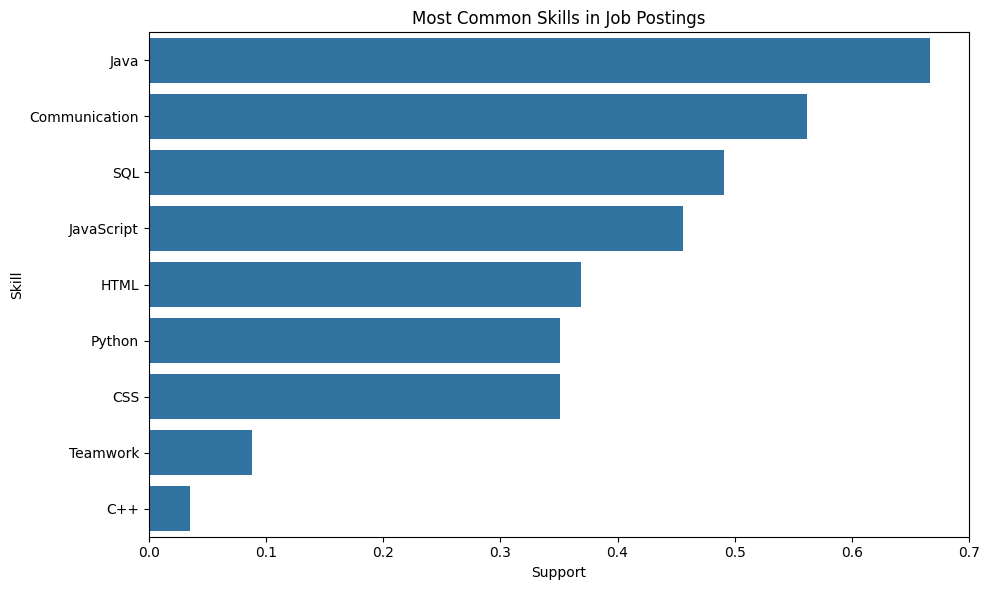

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most frequent single skills
top_skills = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
top_skills = top_skills.sort_values('support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_skills['itemsets'].apply(lambda x: list(x)[0]), data=top_skills)
plt.title("Most Common Skills in Job Postings")
plt.xlabel("Support")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


The chart displays the most frequently occurring skills across job postings, based on support (i.e., how often each skill appears across all job ads).

Top skills with the highest support:

- Java (appears in nearly 70% of job postings)

- Communication

- SQL

- JavaScript

- HTML

Technical skills dominate the list, with Java, SQL, JavaScript, HTML, Python, and CSS forming the core of many job requirements.

Soft skills like Communication and Teamwork also appear, indicating well-rounded candidate expectations.

#**CLUSTERING**

**This section highlights the group similar job posts by title and skills**

Text Preprocessing (Combine Title + Skills)

In [ ]:
import pandas as pd
import ast

# Load data
df = pd.read_csv("cleaned_scraped_jobs.csv")
df = df.dropna(subset=['JobTitle', 'Skills'])

# Convert skills from string to list
df['Skills'] = df['Skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Combine Job Title and Skills into one text field
df['CombinedText'] = df['JobTitle'] + " " + df['Skills'].apply(lambda x: ' '.join(x))


Vectorize Text using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['CombinedText'])


Apply KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

# Try with 5 clusters (you can adjust this)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


Visualize Top Words in Each Cluster

In [ ]:
import numpy as np

# Get top terms per cluster
def get_top_terms_per_cluster(tfidf_matrix, kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]

    cluster_terms = {}
    for i in range(kmeans_model.n_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        cluster_terms[f"Cluster {i}"] = top_terms
    return cluster_terms

top_terms = get_top_terms_per_cluster(X, kmeans, vectorizer)
pd.DataFrame.from_dict(top_terms, orient='index')


,0,1,2,3,4,5,6,7,8,9
Cluster 0,specialist,training,seo,relations,public,communications,pr,marketing,optimization,media
Cluster 1,engineer,software,mechanical,electrical,robotics,data,chemical,environmental,civil,principal
Cluster 2,senior,engineer,developer,java,data,manager,software,designer,analyst,scientist
Cluster 3,developer,time,analyst,designer,associate,assistant,waiter,driver,data,java
Cluster 4,manager,operations,sales,marketing,store,retail,construction,project,property,warehouse


Additional: Visualize Using 2D t-SNE

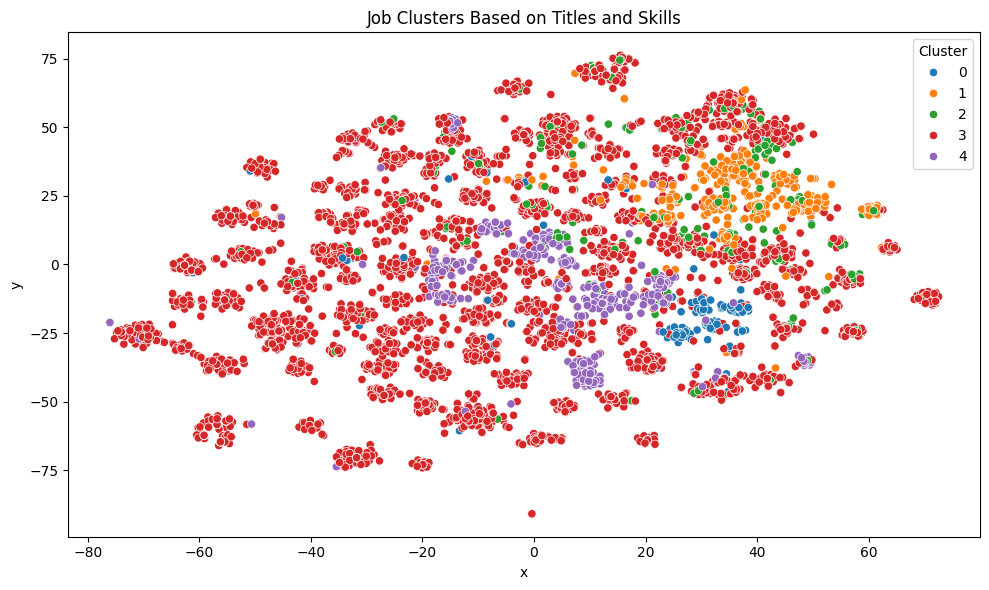

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_2d = tsne.fit_transform(X.toarray())

df['x'] = X_2d[:,0]
df['y'] = X_2d[:,1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='Cluster', palette='tab10')
plt.title("Job Clusters Based on Titles and Skills")
plt.tight_layout()
plt.show()


The scatter plot visualizes job postings clustered based on job titles and skills using a dimensionality reduction technique (likely t-SNE or PCA).

There are 5 identified clusters labeled 0 to 4, each represented by a different color.

The red cluster (Cluster 0) is dominant, occupying the largest space and number of points, suggesting a broad category or overlapping/general job roles.

Smaller clusters (like Clusters 1–4) are more distinct and densely packed, likely representing specialized job groups such as tech roles, logistics, or service industry jobs.



The clustering successfully groups jobs with similar titles and required skills, useful for job recommendation systems or candidate-job matching engines.

Cluster 0 likely includes more generic or overlapping skill sets, which may need further filtering or feature engineering to refine.

Other clusters (e.g., 1, 2, 3, 4) can represent:

- Tech-heavy jobs (Java, SQL, Python)

- Service/hospitality roles

- Engineering or mechanical roles

These insights can help in creating targeted hiring funnels, custom training modules, or regional skill profiling.

#**Topic Modeling (LDA)**

**In this section, the goal is to discover job categories by analyzing *Description* text**

Preprocess Job Descriptions

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')

# Load dataset
df = pd.read_csv("cleaned_scraped_jobs.csv")
df = df.dropna(subset=['Description'])

# Clean and lower text
df['CleanDesc'] = df['Description'].str.replace(r'[\r\n\t]', ' ', regex=True)
df['CleanDesc'] = df['CleanDesc'].str.replace(r'[^a-zA-Z ]', '', regex=True).str.lower()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vectorize Descriptions (Bag of Words)

In [ ]:
# Use stopwords
stop_words = stopwords.words('english')

# Create CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.95, min_df=5)
X = vectorizer.fit_transform(df['CleanDesc'])


Apply LDA for Topic Modeling

In [ ]:
# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Function to display topics
def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = top_features
    return pd.DataFrame.from_dict(topics, orient='index')

# Show topics
display_topics(lda_model, vectorizer.get_feature_names_out())


,0,1,2,3,4,5,6,7,8,9
Topic 0,work,experience,required,must,job,equipment,position,may,safety,ability
Topic 1,care,health,medical,work,experience,patient,patients,education,position,team
Topic 2,work,team,experience,service,customer,skills,job,ability,food,benefits
Topic 3,experience,design,data,engineering,work,development,team,technical,software,systems
Topic 4,experience,work,team,business,management,skills,role,strong,support,including


Additional: Assign Dominant Topic to Each job Post

In [ ]:
# Assign the most probable topic to each job post
topic_probs = lda_model.transform(X)
df['Topic'] = topic_probs.argmax(axis=1)

# View example
df[['JobTitle', 'Topic']].head()


,JobTitle,Topic
0,Software Engineer II,3
1,Software Engineer II (C++ and Payments Systems),3
2,Principal Software Engineer,3
3,Lead / Senior Software Engineer C# (Cloud Nati...,3
4,Software Engineer,3


The table shows the top 10 keywords from each of the 5 generated topics, extracted from job description text using Latent Dirichlet Allocation (LDA).

Each topic represents a semantic theme or category present in the job listings.

-  **Topic 0**:
Keywords like work, experience, required, equipment, safety, position suggest this topic is focused on manual labor, technical, or field-based roles (e.g., mechanics, warehouse, or engineering technicians).

-  **Topic 1**:
Keywords include care, health, medical, patient, education — clearly centered on healthcare and caregiving professions.

-  **Topic 2**:
With terms like customer, service, benefits, teamwork, this is likely related to customer support, service-oriented roles, or hospitality jobs.

- **Topic 3**:
This topic includes data, engineering, technical, software, development — strongly pointing to tech and engineering jobs, particularly in IT and data science.

-  **Topic 4**:
With business, management, support, role, this topic appears to represent administrative, business operations, or leadership roles.


LDA successfully extracted coherent and interpretable themes from the job texts.

The topics span diverse industries: tech, healthcare, customer service, blue-collar, and business.

These groupings can be used to:

- Classify job descriptions automatically

-  Match job seekers with relevant industries

- Enhance job recommendation systems or job board filtering

